In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "/Users/sambarton/matplotlib-challenge/data/Mouse_metadata.csv"
study_results_path = "/Users/sambarton/matplotlib-challenge/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
                                           

In [3]:
#Merge Dataset
mouse_data_complete = pd.merge(mouse_metadata, study_results, on='Mouse ID', how="outer")
mouse_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
#Sort Values So That We Can Find True Median
sortByTumorVolume = mouse_data_complete.sort_values(["Tumor Volume (mm3)"], ascending=True)
sortByTumorVolume.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1


In [5]:
#Create A Summary Statistics Dataframe

In [6]:
#Groupby Drug Regimen
groupedDrugReg = mouse_data_complete.groupby(["Drug Regimen"])

In [7]:
#Finding the average
groupedDrugMean = groupedDrugReg["Tumor Volume (mm3)"].mean()

In [8]:
#Finding the median
groupedDrugMedian = groupedDrugReg["Tumor Volume (mm3)"].median()

In [9]:
#Finding the variance
groupedDrugVariance = groupedDrugReg["Tumor Volume (mm3)"].var()

In [10]:
#Finding the standard deviation
groupedDrugSTD = groupedDrugReg["Tumor Volume (mm3)"].std()

In [11]:
#Finding the SEM
groupedDrugSEM = groupedDrugReg["Tumor Volume (mm3)"].sem()

In [12]:
summaryStatisticTable = pd.DataFrame({
    "Mean": groupedDrugMean,
    "Median": groupedDrugMedian,
    "Variance": groupedDrugVariance,
    "Std. Deviation": groupedDrugSTD,
    "SEM":groupedDrugSEM
})
summaryStatisticTable

,Mean,Median,Variance,Std. Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
#Counting Number Of Mice Tested In Each Study For Plots
drugRegimenDataPoints = mouse_data_complete.groupby(["Drug Regimen"]).count()["Mouse ID"]
drugRegimenDataPoints

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

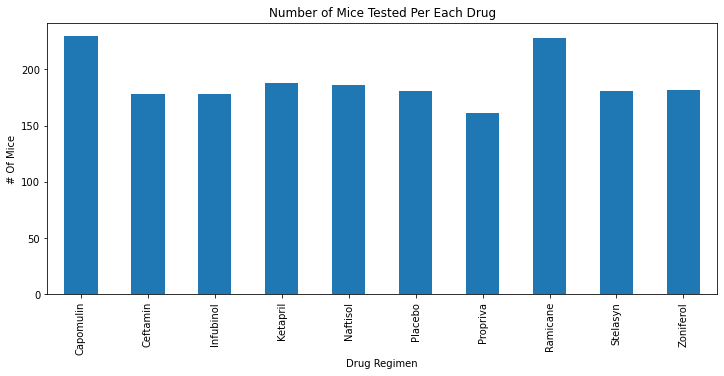

In [14]:
#Plot Using Matplotlib
drugRegimenDataPoints.plot(kind="bar", figsize=(12,5))
plt.xlabel("Drug Regimen")
plt.ylabel("# Of Mice")
plt.title("Number of Mice Tested Per Each Drug")
plt.show()

In [15]:
#Plot Using PyPlot

In [34]:
users = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

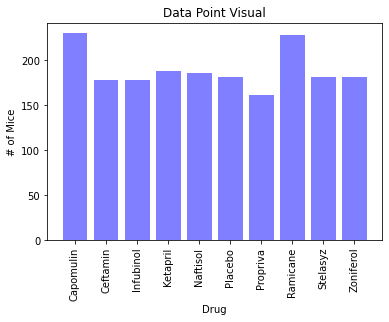

In [43]:
xAxis = np.arange(len(drugRegimenDataPoints))
tick_locations = [value for value in xAxis]
plt.bar(xAxis, users, color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyz','Zoniferol'], rotation='vertical')

plt.title("Data Point Visual")
plt.xlabel("Drug")
plt.ylabel("# of Mice")

plt.show()

In [51]:
#Pie Chart Using Matplotlib
sex = mouse_data_complete.groupby(["Sex"]).count()["Mouse ID"]
sex

Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64

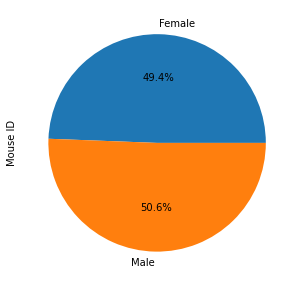

In [52]:
sex.plot(kind="pie", figsize=(12,5), autopct="%1.1f%%")
plt.show()

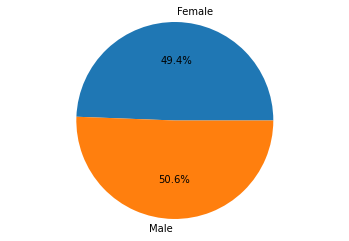

In [70]:
#Pie Chart Using PyPlot

gender=["Female", "Male"]

gender_counts= [935, 938]

plt.pie(sex, labels=gender, autopct="%1.1f%%")

plt.axis("equal")
plt.show()

In [71]:
mouse_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [ ]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
#Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine 
#if there are any potential outliers across all four treatment regimens.

#mouse_data_complete.groupby(["Drug Regimen"]).count()["Mouse ID"]

In [78]:
#Final Tumor Volume
groupByDrugRegimen = mouse_data_complete.groupby(["Drug Regimen"]).sum()["Tumor Volume (mm3)"]
bestDrugs_df = pd.DataFrame(groupByDrugRegimen[['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']])

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,9355.420462
Ramicane,9169.417875
Infubinol,9413.493529
Ceftamin,9361.228582


In [82]:
#gFilter out the rows from your dataframe with condition. Condition = THose rows containing these 4 drug names
#Groupby this dataframe(which you obtained before) & describe...!!

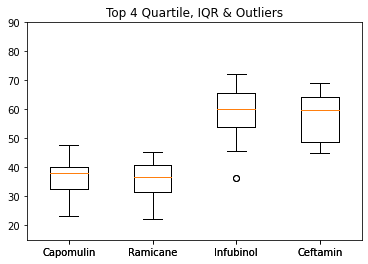

In [99]:
lastWeightTumor = mouse_data_complete.groupby(["Drug Regimen", 'Mouse ID']).last()['Tumor Volume (mm3)']
top4WeightTumor = pd.DataFrame(lastWeightTumor)

top4Labels = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

finalTop4 = top4WeightTumor.reset_index()
tumorLists = finalTop4.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumorListDf = pd.DataFrame(tumorLists)
tumorListDf = tumorListDf.reindex(top4Labels)
tumorVolume = [vol for vol in tumorListDf['Tumor Volume (mm3)']]
plt.boxplot(tumorVolume, labels=top4Labels)
plt.ylim(15, 90)
plt.boxplot(tumorVolume, labels=top4Labels)
plt.title("Top 4 Quartile, IQR & Outliers")
plt.show()

In [101]:
#Pick A Mouse That Took Drug Capomulin and Create A Line Plot Of Tumor Volume vs. Timepoint
#Mouse = s185

In [109]:
timeVsTumor = mouse_data_complete[mouse_data_complete["Mouse ID"].isin(["s185"])]

timeVsTumorData = timeVsTumor[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

